In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error



c:\Users\Deathnote\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Deathnote\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Deathnote\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Reading the bodyfat.csv file using pandas and storing it in df.
df = pd.read_csv("Smart watch prices.csv")

In [3]:
# displays first 5 rows of the dataset.
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


In [9]:
df.describe(include= 'all')

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
count,378,378,376,378,377,376.000000,375,378,378,378,378,378,378
unique,42,137,35,5,27,NaN,36,7,30,1,2,2,50
top,Garmin,Sense,Wear OS,"Bluetooth, Wi-Fi",AMOLED,NaN,454 x 454,50,14,Yes,Yes,Yes,$299
freq,34,15,131,293,207,NaN,90,275,83,378,348,317,57
mean,NaN,NaN,NaN,NaN,NaN,1.363165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.218986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.390000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [665]:
display_types = df['Brand'].value_counts().sort_values(ascending=False)
print(display_types.iloc[:24])

Garmin          34
Mobvoi          24
Fitbit          24
Fossil          23
Amazfit         20
Samsung         19
Huawei          19
TicWatch        18
Xiaomi          17
Skagen          17
Suunto          16
Honor           14
Apple           14
Polar           12
Casio           10
Withings         9
Oppo             9
Timex            8
Diesel           7
Misfit           7
LG               6
Zepp             6
Michael Kors     6
TAG Heuer        4
Name: Brand, dtype: int64


In [666]:
display_types = df['Model'].value_counts().sort_values(ascending=False)
print(display_types.iloc[:24])

Sense               15
Falster 3           14
Sport               13
Watch GT 2 Pro      12
TicWatch E3         12
Forerunner 945      12
Mi Watch Revolve    10
9 Peak               8
7                    7
Galaxy Watch 3       7
Watch SE             7
ScanWatch            7
Pro 3                7
GTR 2                7
Watch GS Pro         6
GTR 2e               6
Watch Series 6       6
Vantage V2           5
Hybrid HR            5
Venu Sq              5
MagicWatch 2         5
TicWatch Pro 3       5
Vapor X              5
Z                    5
Name: Model, dtype: int64


In [667]:
display_types = df['Operating System'].value_counts().sort_values(ascending=False)
print(display_types.iloc[:24])

Wear OS           131
Garmin OS          34
Lite OS            26
Fitbit OS          24
Amazfit OS         19
watchOS            14
Tizen OS           14
Proprietary OS     12
Polar OS           11
Proprietary         9
Suunto OS           9
Android Wear        9
ColorOS             7
Withings OS         6
Zepp OS             5
Casio OS            4
Timex OS            4
LiteOS              4
Tizen               4
HarmonyOS           3
Custom OS           3
Fossil OS           3
Android OS          3
Android             2
Name: Operating System, dtype: int64


In [668]:
display_types = df['GPS'].value_counts().sort_values(ascending=False)
print(display_types.iloc[:])

Yes    348
No      30
Name: GPS, dtype: int64


In [669]:
df.isna().sum()

Brand                        1
Model                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64

In [670]:
# Replace null values in object columns with mode
object_columns = df.select_dtypes(include=["object"]).columns
for col in object_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)


In [671]:
# Replace null values in float column with mean
float_column = df.select_dtypes(include=["float64"]).columns
for col in float_column:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

In [672]:
df.isna().sum()

Brand                        0
Model                        0
Operating System             0
Connectivity                 0
Display Type                 0
Display Size (inches)        0
Resolution                   0
Water Resistance (meters)    0
Battery Life (days)          0
Heart Rate Monitor           0
GPS                          0
NFC                          0
Price (USD)                  0
dtype: int64

In [673]:
df = df.rename(columns={
    'Display Size (inches)' : 'Display Size',
    'Water Resistance (meters)' : 'Water Resistance',
    'Battery Life (days)' : 'Battery Life',
    'Price (USD)' : 'Price'
})

In [674]:
df['Water Resistance'].unique()

array(['50', '30', '100', '1.5', 'Not specified', '200', '10'],
      dtype=object)

In [675]:
df['Water Resistance'].describe()

count     379
unique      7
top        50
freq      276
Name: Water Resistance, dtype: object

In [676]:
df['Water Resistance'] = df['Water Resistance'].replace({'Not specified' : '50'})

In [677]:
df['Display Size'].unique()

array([1.9       , 1.4       , 1.3       , 1.58      , 1.28      ,
       1.43      , 1.75      , 1.39      , 1.36316489, 1.65      ,
       1.2       , 1.57      , 1.        , 1.78      , 1.91      ,
       1.38      , 1.06      , 1.35      , 1.34      , 0.9       ,
       1.04      , 1.64      , 1.19      , 4.01      , 1.6       ,
       1.42      , 2.1       , 1.23      , 1.1       , 1.22      ,
       1.5       , 1.36      , 1.32      ])

In [678]:
df['Display Size'] = df['Display Size'].round(1)

In [679]:
df['Battery Life'].unique()

array(['18', '40', '11', '6', '24', '14', '2', '4', '12', '30', '3', '45',
       '5', '10', '48', '7', '16', '9', '25', '72', '60', '56', '70', '1',
       '48 hours', '15', 'Unlimited', '1.5', '20', '8'], dtype=object)

In [680]:
df['Battery Life'].describe()

count     379
unique     30
top        14
freq       84
Name: Battery Life, dtype: object

In [681]:
df['Battery Life'] = df['Battery Life'].replace({'48 hours' : '14', 'Unlimited' : '14'})

In [682]:
df['Price'] = df['Price'].str[1:]

In [683]:
#df['Price'] = df['Price'].replace(',','')
df['Price'] = df['Price'].str.replace(',', '')

In [684]:
df['Price'] = df['Price'].str.strip()

In [685]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,Heart Rate Monitor,GPS,NFC,Price
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.9,396 x 484,50,18,Yes,Yes,Yes,399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.4,450 x 450,50,40,Yes,Yes,Yes,249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.3,416 x 416,50,11,Yes,Yes,No,399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.6,336 x 336,50,6,Yes,Yes,Yes,229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.3,416 x 416,30,24,Yes,Yes,Yes,299


In [686]:

df['Heart Rate Monitor'].unique()


array(['Yes'], dtype=object)

In [687]:
df.drop('Heart Rate Monitor', axis=1, inplace= True)

In [688]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,GPS,NFC,Price
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.9,396 x 484,50,18,Yes,Yes,399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.4,450 x 450,50,40,Yes,Yes,249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.3,416 x 416,50,11,Yes,No,399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.6,336 x 336,50,6,Yes,Yes,229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.3,416 x 416,30,24,Yes,Yes,299


In [689]:
df['Water Resistance'] = df['Water Resistance'].astype(float)

In [690]:
df['Battery Life'] = df['Battery Life'].astype(float)

In [691]:
df['Price'] = df['Price'].astype(float)

In [692]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,GPS,NFC,Price
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.9,396 x 484,50.0,18.0,Yes,Yes,399.0
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.4,450 x 450,50.0,40.0,Yes,Yes,249.0
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.3,416 x 416,50.0,11.0,Yes,No,399.0
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.6,336 x 336,50.0,6.0,Yes,Yes,229.0
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.3,416 x 416,30.0,24.0,Yes,Yes,299.0


In [693]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             379 non-null    object 
 1   Model             379 non-null    object 
 2   Operating System  379 non-null    object 
 3   Connectivity      379 non-null    object 
 4   Display Type      379 non-null    object 
 5   Display Size      379 non-null    float64
 6   Resolution        379 non-null    object 
 7   Water Resistance  379 non-null    float64
 8   Battery Life      379 non-null    float64
 9   GPS               379 non-null    object 
 10  NFC               379 non-null    object 
 11  Price             379 non-null    float64
dtypes: float64(4), object(8)
memory usage: 35.7+ KB


In [694]:
data = df
data.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,GPS,NFC,Price
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.9,396 x 484,50.0,18.0,Yes,Yes,399.0
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.4,450 x 450,50.0,40.0,Yes,Yes,249.0
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.3,416 x 416,50.0,11.0,Yes,No,399.0
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.6,336 x 336,50.0,6.0,Yes,Yes,229.0
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.3,416 x 416,30.0,24.0,Yes,Yes,299.0


# Univariate Analysis

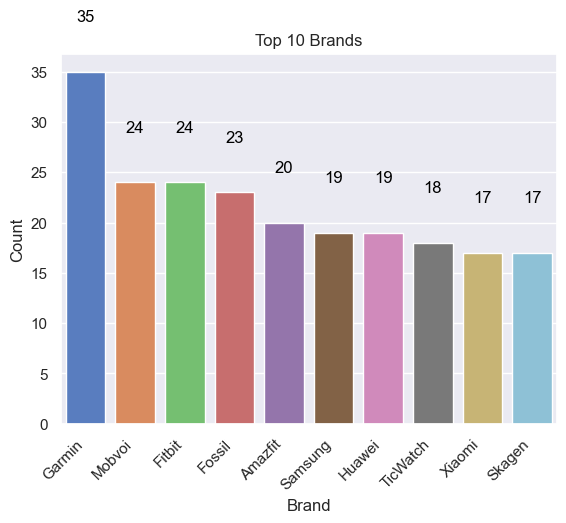

In [695]:
# Get the top 10 brands
top_brands = data['Brand'].value_counts().index[:10]
counts = data['Brand'].value_counts().values[:10]

# Set the style
sns.set_style("darkgrid")

# Create the bar plot using Seaborn
ax = sns.barplot(x=top_brands, y=counts, palette="muted")

# Set the x-tick labels to be rotated and aligned properly
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add value labels on the bars
for i, v in enumerate(counts):
    ax.text(i, v+5, str(v), color='black', ha='center')

# Set the axis labels and title
ax.set(xlabel='Brand', ylabel='Count', title='Top 10 Brands')

# Display the plot
plt.show()

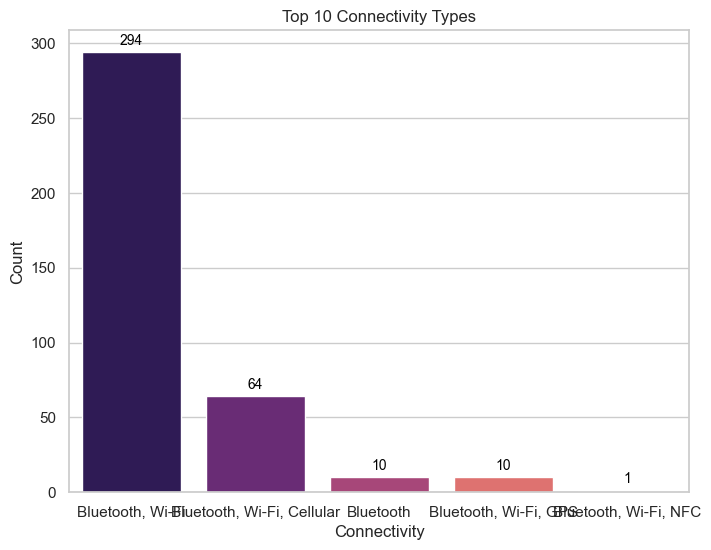

In [696]:
# Set the plot style
sns.set_style('whitegrid')

# Get the top 10 connectivity types
top_connectivity = data['Connectivity'].value_counts().index[:10]
connectivity_counts = data['Connectivity'].value_counts().values[:10]

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=top_connectivity, y=connectivity_counts, palette='magma', ax=ax)

# Set the axis labels and title
ax.set(xlabel='Connectivity', ylabel='Count', title='Top 10 Connectivity Types')

# Add labels to the bars
for i, v in enumerate(connectivity_counts):
    ax.text(i, v+5, str(v), color='black', ha='center', fontsize=10)

# Display the plot
plt.show()

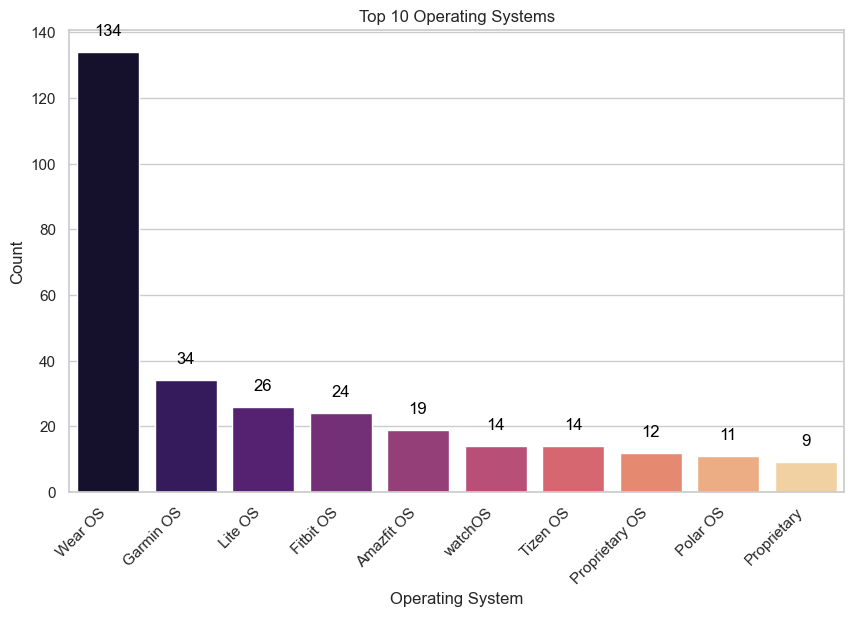

In [697]:
# Set the plot style
sns.set_style('whitegrid')

# Get the top 10 operating systems
top_os = data['Operating System'].value_counts().index[:10]
os_counts = data['Operating System'].value_counts().values[:10]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=top_os, y=os_counts, palette='magma')

# Set the axis labels and title
ax.set(xlabel='Operating System', ylabel='Count', title='Top 10 Operating Systems')

# Rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for i, v in enumerate(os_counts):
    ax.text(i, v+5, str(v), color='black', ha='center')

# Display the plot
plt.show()

# Bi variate analysis

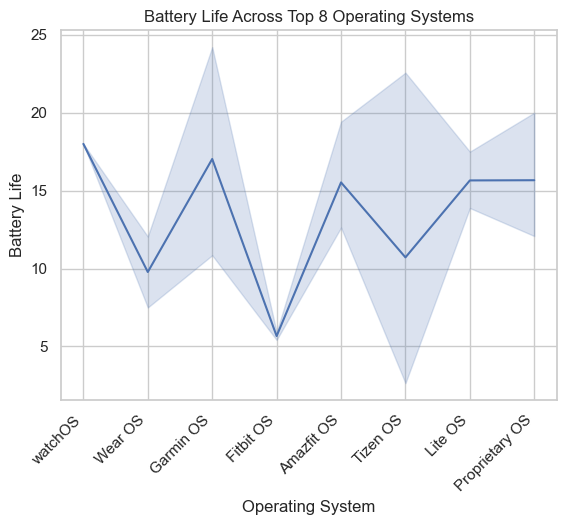

In [698]:
# Filter the top 8 operating systems by frequency count
top_operating_systems = data['Operating System'].value_counts().head(8).index.tolist()
data_top_operating_systems = data[data['Operating System'].isin(top_operating_systems)]

# Set the plot style
sns.set_style('whitegrid')

# Create the line plot
sns.lineplot(x='Operating System', y='Battery Life', data=data_top_operating_systems)

# Set the axis labels and title
plt.xlabel('Operating System')
plt.ylabel('Battery Life')
plt.title('Battery Life Across Top 8 Operating Systems')

# Align x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()



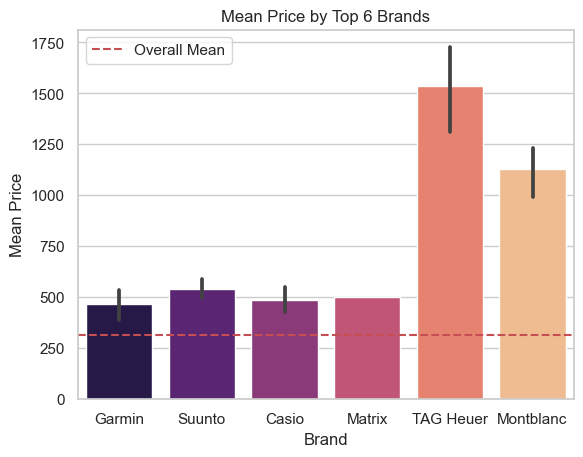

In [699]:
# Get the top 6 brands by mean price
top_brands = data.groupby('Brand')['Price'].mean().nlargest(6).reset_index()['Brand'].tolist()
data_top_brands = data[data['Brand'].isin(top_brands)]

# Set the plot style
sns.set_style('whitegrid')

# Create the bar plot
sns.barplot(x='Brand', y='Price', data=data_top_brands, palette='magma')

# Add a line for the overall mean price
mean_price = data['Price'].mean()
plt.axhline(mean_price, color='r', linestyle='--', label='Overall Mean')

# Set the axis labels and title
plt.xlabel('Brand')
plt.ylabel('Mean Price')
plt.title('Mean Price by Top 6 Brands')

# Display the plot
plt.legend()
plt.show()


# multivariate analysis

c:\Users\Deathnote\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


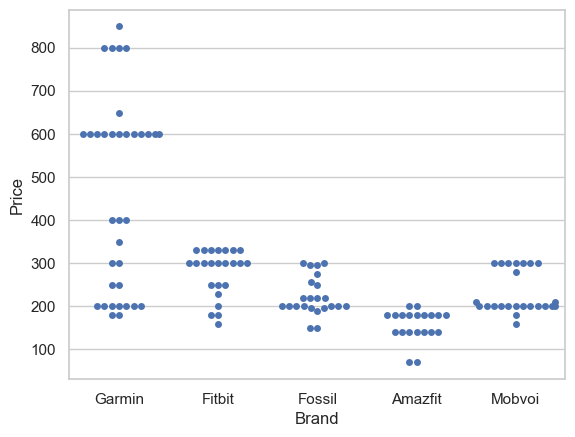

In [700]:
sns.set(style="whitegrid")


# Identify the top 5 brands by frequency
top_5_brands = data['Brand'].value_counts().head(5).index.tolist()

# Filter the dataset to include only the top 5 brands
df_top_5_brands = data[data['Brand'].isin(top_5_brands)]

# Create a swarmplot
sns.swarmplot(x="Brand", y="Price", data=df_top_5_brands)

# Show the plot
plt.show()

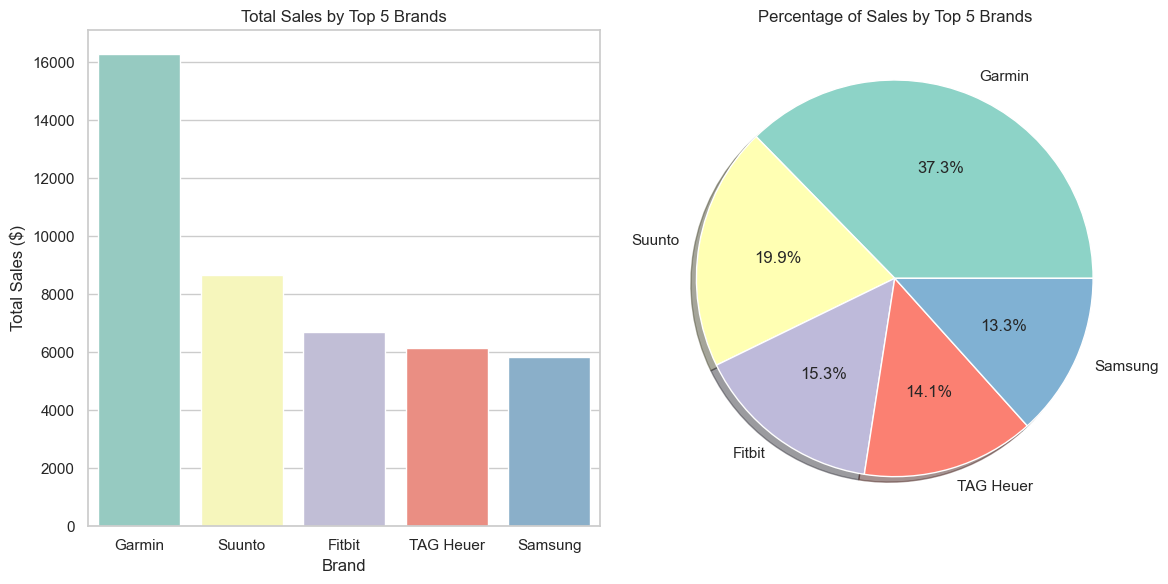

In [701]:
# Calculate total sales for each brand
total_sales = data.groupby('Brand')['Price'].sum().reset_index()

# Sort the brands by total sales in descending order
top_brands = total_sales.sort_values('Price', ascending=False).head(5)

# Calculate the percentage of sales for each brand
top_brands['Percent'] = top_brands['Price'] / top_brands['Price'].sum() * 100

# Create a grid with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Plot a bar chart for total sales by brand
sns.barplot(x='Brand', y='Price', data=top_brands, palette='Set3', ax=axes[0])
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('Total Sales ($)')
axes[0].set_title('Total Sales by Top 5 Brands')

# Plot a pie chart for percentage of sales by brand
colors = sns.color_palette('Set3', top_brands.shape[0]).as_hex()
axes[1].pie(top_brands['Percent'], labels=top_brands['Brand'], colors=colors, autopct='%1.1f%%', shadow=True)
axes[1].set_title('Percentage of Sales by Top 5 Brands')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


C:\Users\Deathnote\AppData\Local\Temp\ipykernel_34192\4057750562.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

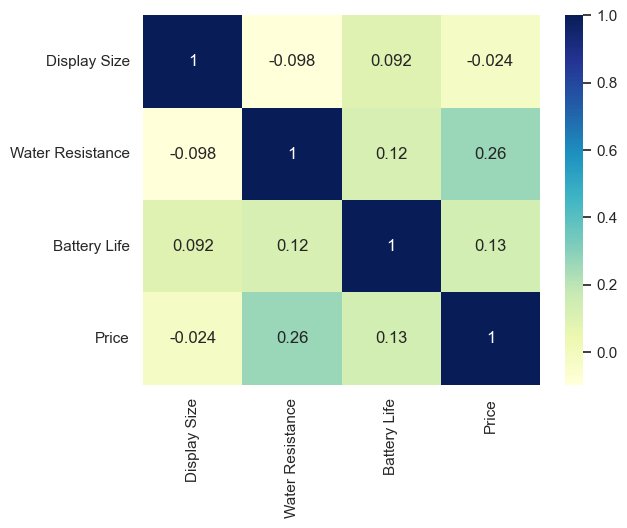

In [702]:
# Compute the correlation matrix
corr = data.corr()

# Visualize the correlation matrix using heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="YlGnBu")

In [703]:
value = df['Model'].value_counts()
filtered_values = value[value < 2]
len(filtered_values)

73

In [704]:
df_test = df
df_test

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,GPS,NFC,Price
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.9,396 x 484,50.0,18.0,Yes,Yes,399.0
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.4,450 x 450,50.0,40.0,Yes,Yes,249.0
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.3,416 x 416,50.0,11.0,Yes,No,399.0
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.6,336 x 336,50.0,6.0,Yes,Yes,229.0
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.3,416 x 416,30.0,24.0,Yes,Yes,299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.4,348 x 442,50.0,30.0,No,Yes,279.0
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.4,454 x 454,50.0,15.0,Yes,Yes,349.0
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.4,454 x 454,50.0,25.0,Yes,Yes,249.0
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.6,326 x 326,50.0,14.0,No,Yes,159.0


In [705]:
value_counts = df_test['Model'].value_counts()
unique_values = value_counts[value_counts < 2].index.tolist()
df_test = df_test[~df_test['Model'].isin(unique_values)]

In [706]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 6 to 378
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             306 non-null    object 
 1   Model             306 non-null    object 
 2   Operating System  306 non-null    object 
 3   Connectivity      306 non-null    object 
 4   Display Type      306 non-null    object 
 5   Display Size      306 non-null    float64
 6   Resolution        306 non-null    object 
 7   Water Resistance  306 non-null    float64
 8   Battery Life      306 non-null    float64
 9   GPS               306 non-null    object 
 10  NFC               306 non-null    object 
 11  Price             306 non-null    float64
dtypes: float64(4), object(8)
memory usage: 31.1+ KB


In [708]:
lb = LabelEncoder()

In [709]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df[col] = lb.fit_transform(df[col])

In [710]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,GPS,NFC,Price
0,1,127,34,2,17,1.9,27,50.0,18.0,1,1,399.0
1,30,36,31,2,0,1.4,31,50.0,40.0,1,1,249.0
2,8,105,9,1,0,1.3,30,50.0,11.0,1,0,399.0
3,6,109,7,1,0,1.6,19,50.0,6.0,1,1,229.0
4,7,43,31,1,0,1.3,30,30.0,24.0,1,1,299.0


In [711]:
categorical_cols = df_test.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df_test[col] = lb.fit_transform(df_test[col])
df_test = df_test.reset_index()
df_test.head()

C:\Users\Deathnote\AppData\Local\Temp\ipykernel_34192\1632830793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col] = lb.fit_transform(df_test[col])
C:\Users\Deathnote\AppData\Local\Temp\ipykernel_34192\1632830793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col] = lb.fit_transform(df_test[col])
C:\Users\Deathnote\AppData\Local\Temp\ipykernel_34192\1632830793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,index,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,GPS,NFC,Price
0,6,28,6,26,2,7,1.3,20,50.0,2.0,1,1,199.0
1,7,20,51,3,1,0,1.8,22,50.0,4.0,1,1,199.0
2,9,24,20,26,0,0,1.4,28,30.0,14.0,0,0,195.0
3,10,31,34,27,0,0,1.6,8,50.0,30.0,1,1,279.0
4,11,30,23,26,0,0,1.2,23,30.0,3.0,0,0,179.0


#  Buiding the model for Prediction

In [712]:
# X consists of independent variables
X = df.drop(['Price'],axis=1)
X

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,GPS,NFC
0,1,127,34,2,17,1.9,27,50.0,18.0,1,1
1,30,36,31,2,0,1.4,31,50.0,40.0,1,1
2,8,105,9,1,0,1.3,30,50.0,11.0,1,0
3,6,109,7,1,0,1.6,19,50.0,6.0,1,1
4,7,43,31,1,0,1.3,30,30.0,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
374,38,79,32,1,16,1.4,21,50.0,30.0,0,1
375,41,132,33,2,0,1.4,32,50.0,15.0,1,1
376,9,119,12,1,0,1.4,32,50.0,25.0,1,1
377,26,118,5,1,0,1.6,17,50.0,14.0,0,1


In [713]:
y = df['Price']
y

0      399.0
1      249.0
2      399.0
3      229.0
4      299.0
       ...  
374    279.0
375    349.0
376    249.0
377    159.0
378    299.0
Name: Price, Length: 379, dtype: float64

In [714]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(303, 11)
(76, 11)
(303,)
(76,)


# Linear Regression

In [715]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [716]:
predict_train = lr.predict(X_train)

In [717]:
# training score
error_score_lr_train = r2_score(y_train, predict_train)
print("R2 error is: ", error_score_lr_train)
mse = mean_squared_error(y_train, predict_train)
rmse_lr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_train)

R2 error is:  0.22931891720289843
Root Mean Squared Error: 179.92233456305982


In [718]:
predict_test = lr.predict(X_test)

In [719]:
# testing score
error_score_lr_test = r2_score(y_test, predict_test)
print("R2 error is: ", error_score_lr_test)
mse = mean_squared_error(y_test, predict_test)
rmse_lr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_test)

R2 error is:  0.16603596698553302
Root Mean Squared Error: 172.23706255286191


# Random Forest Regressor

In [720]:
rfr = RandomForestRegressor(n_estimators = 50,
                             max_depth = 8,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=0.8,
                      min_weight_fraction_leaf=0.05, n_estimators=50,
                      random_state=42)

In [721]:
predict_train_rfr = rfr.predict(X_train)

In [722]:
# training score
error_score_rfr_train = r2_score(y_train, predict_train_rfr)
print("R2 error is: ", error_score_rfr_train)
mse = mean_squared_error(y_train, predict_train_rfr)
rmse_rfr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_train)

R2 error is:  0.4977390127720518
Root Mean Squared Error: 145.24876590763805


In [723]:
predict_test_rfr = rfr.predict(X_test)

In [724]:
# testing score
error_score_rfr_test = r2_score(y_test, predict_test_rfr)
print("R2 error is: ", error_score_rfr_test)
mse = mean_squared_error(y_test, predict_test_rfr)
rmse_rfr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_test)

R2 error is:  0.42767708530475834
Root Mean Squared Error: 142.68342213482845


# Decision Tree Regressor

In [725]:
dtr = DecisionTreeRegressor(max_depth= 2, min_samples_split= 6, min_samples_leaf= 5)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, min_samples_split=6)

In [726]:
predict_train_dtr = dtr.predict(X_train)

In [727]:
# training score
error_score_dtr_train = r2_score(y_train, predict_train_dtr)
print("R2 error is: ", error_score_dtr_train)
mse = mean_squared_error(y_train, predict_train_dtr)
rmse_dtr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_dtr_train)

R2 error is:  0.3429614927518523
Root Mean Squared Error: 166.12811592656647


In [728]:
predict_test_dtr = dtr.predict(X_test)

In [729]:
# testing score
error_score_dtr_test = r2_score(y_test, predict_test_dtr)
print("R2 error is: ", error_score_dtr_test)
mse = mean_squared_error(y_test, predict_test_dtr)
rmse_dtr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_dtr_test)

R2 error is:  0.18085636154493812
Root Mean Squared Error: 170.69978774403583


# Gradient Boosting Regressor

In [730]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [731]:
predict_train_gbr = gbr.predict(X_train)

In [732]:
# training score
error_score_gbr_train = r2_score(y_train, predict_train_gbr)
print("R2 error is: ", error_score_gbr_train)
mse = mean_squared_error(y_train, predict_train_gbr)
rmse_gbr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_gbr_train)

R2 error is:  0.41649950162493654
Root Mean Squared Error: 156.55550514239548


In [733]:
predict_test_gbr = gbr.predict(X_test)

In [734]:
# testing score
error_score_gbr_test = r2_score(y_test, predict_test_gbr)
print("R2 error is: ", error_score_gbr_test)
mse = mean_squared_error(y_test, predict_test_gbr)
rmse_gbr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_gbr_test)

R2 error is:  0.4141301569073098
Root Mean Squared Error: 144.36220988703525


In [735]:
#xgb = XGBRegressor()
#param_grid = {
    #'n_estimators': [100, 300,500,700, 1000],
    #'learning_rate': [0.01,0.03, 0.05,0.07, 0.1,0.12],
    #'max_depth': [3,4, 5, 7,9,11],
    #'subsample': [0.3,0.5, 0.7,0.9, 1.0],
    #'colsample_bytree': [0.3,0.5, 0.7,0.9, 1.0]
#}
#grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2')
#grid_search.fit(X_train, y_train)
#print(grid_search.best_params_)
#xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=7, subsample=1.0, colsample_bytree=0.7)
#xgb.fit(X_train, y_train)


# XG Boost

In [736]:

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.06, max_depth=2, subsample=0.7,
                    colsample_bytree=0.4,colsample_bylevel = 0.5,
                   max_leaves = 3, random_state = 1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.5, colsample_bynode=None, colsample_bytree=0.4,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [737]:
predict_train_xgb = xgb.predict(X_train)

In [738]:
# training score
error_score_xgb_train = r2_score(y_train, predict_train_xgb)
print("R2 error is: ", error_score_xgb_train)
mse = mean_squared_error(y_train, predict_train_xgb)
rmse_xgb_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_xgb_train)

R2 error is:  0.9572427378590717
Root Mean Squared Error: 42.37919201548533


In [739]:
predict_test_xgb = xgb.predict(X_test)

In [740]:
# testing score
error_score_xgb_test = r2_score(y_test, predict_test_xgb)
print("R2 error is: ", error_score_xgb_test)
mse = mean_squared_error(y_test, predict_test_xgb)
rmse_xgb_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_xgb_test)

R2 error is:  0.8419333811810408
Root Mean Squared Error: 74.98476442359669


# Comparing the results

In [741]:
results = pd.DataFrame(columns=['Model', 'Training R2', 'Testing R2', 'Training RMSE', 'Testing RMSE'])
results.loc[0] = ['Linear Regression', error_score_lr_train, error_score_lr_test, rmse_lr_train, rmse_lr_test]
results.loc[1] = ['Decision Tree Regressor', error_score_dtr_train, error_score_dtr_test, rmse_dtr_train, rmse_dtr_test]
results.loc[2] = ['Random Forest Regressor', error_score_rfr_train, error_score_rfr_test, rmse_rfr_train, rmse_rfr_test]
results.loc[3] = ['Gradient Boosting Regressor', error_score_gbr_train, error_score_gbr_test, rmse_gbr_train, rmse_gbr_test]
results.loc[4] = ['XG Boost Regressor', error_score_xgb_train, error_score_xgb_test, rmse_xgb_train, rmse_xgb_test]


print(results)

                         Model  Training R2  Testing R2  Training RMSE  \
0            Linear Regression     0.229319    0.166036     179.922335   
1      Decision Tree Regressor     0.342961    0.180856     166.128116   
2      Random Forest Regressor     0.497739    0.427677     145.248766   
3  Gradient Boosting Regressor     0.416500    0.414130     156.555505   
4           XG Boost Regressor     0.957243    0.841933      42.379192   

   Testing RMSE  
0    172.237063  
1    170.699788  
2    142.683422  
3    144.362210  
4     74.984764  


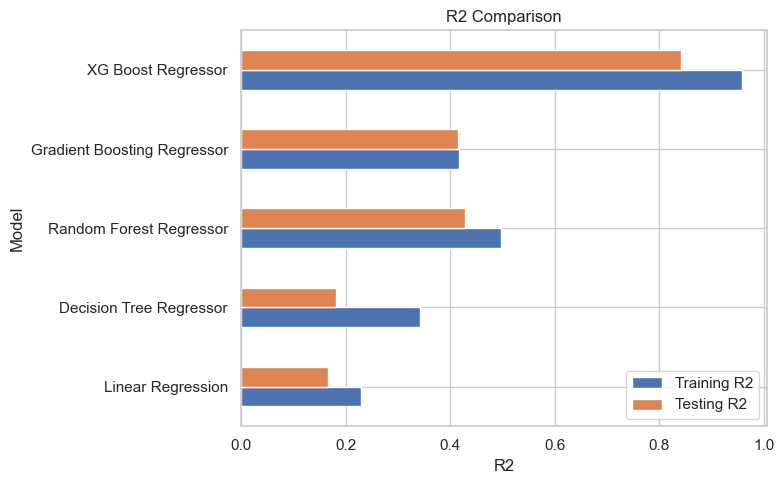

In [742]:
fig, ax = plt.subplots(figsize=(8, 5))
results.plot(x='Model', y=['Training R2', 'Testing R2'], kind='barh', ax=ax)
ax.set_xlabel('R2')
ax.set_title('R2 Comparison')
plt.tight_layout()
plt.show()

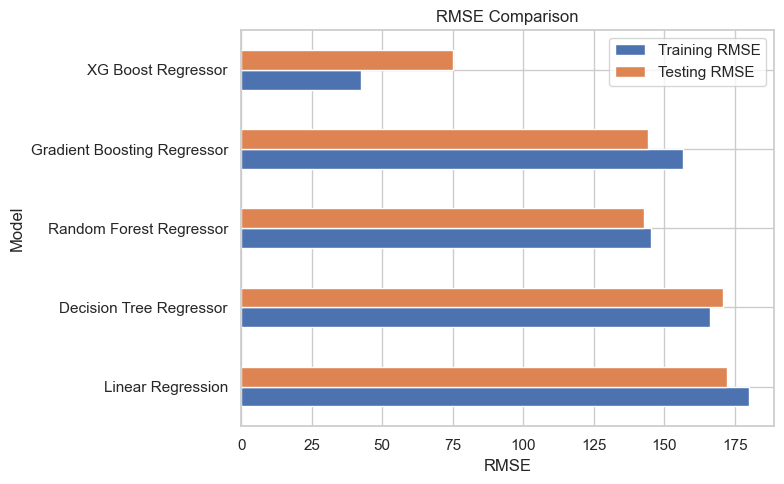

In [743]:
fig, ax = plt.subplots(figsize=(8, 5))
results.plot(x='Model', y=['Training RMSE', 'Testing RMSE'], kind='barh', ax=ax)
ax.set_xlabel('RMSE')
ax.set_title('RMSE Comparison')
plt.tight_layout()
plt.show()

In [744]:
# dumping the selected model
pickle.dump(xgb,open('SW.pkl','wb'))

In [745]:
prediction = xgb.predict(pd.DataFrame([[6,109,7,1,0,1.6,19,50.0,6.0,1,1]], columns= ['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type', 'Display Size',
       'Resolution', 'Water Resistance','Battery Life','GPS','NFC']))
prediction

array([244.14438], dtype=float32)

# Used as reference for the main.py() file

In [746]:
display_types = df['Brand'].value_counts().sort_values(ascending=False)
print(display_types.iloc[:24])

8     35
18    24
6     24
7     23
0     20
30    19
10    19
35    18
39    17
31    17
33    16
9     14
1     14
27    12
3     10
38     9
26     9
37     8
4      7
17     7
13     6
41     6
16     6
34     4
Name: Brand, dtype: int64


In [747]:
display_types = df['Model'].value_counts().sort_values(ascending=False)
print(display_types.iloc[:24])

81     16
22     14
84     13
121    12
94     12
24     12
62     10
2       8
0       7
35      7
125     7
79      7
71      7
29      7
119     6
30      6
126     6
102     5
44      5
106     5
56      5
97      5
104     5
132     5
Name: Model, dtype: int64


In [748]:
display_types = df['Operating System'].value_counts().sort_values(ascending=False)
print(display_types.iloc[:24])

31    134
9      34
12     26
7      24
0      19
34     14
30     14
23     12
21     11
22      9
27      9
3       9
5       7
32      6
33      5
4       4
28      4
13      4
29      4
10      3
6       3
8       3
2       3
1       2
Name: Operating System, dtype: int64


In [749]:
display_types = df['Connectivity'].value_counts().sort_values(ascending=False)
print(display_types.iloc[:])

1    294
2     64
0     10
3     10
4      1
Name: Connectivity, dtype: int64


In [750]:
display_types = df['Display Type'].value_counts().sort_values(ascending=False)
print(display_types.iloc[:15])

0     209
9      30
25     28
21     17
14     17
17     14
8      14
23      9
16      8
4       7
13      3
20      3
15      3
10      2
7       2
Name: Display Type, dtype: int64


In [751]:
display_types = df['Resolution'].value_counts().sort_values(ascending=False)
print(display_types.iloc[:22])

32    94
22    53
8     49
25    41
30    17
28    17
19    16
18    10
23    10
15     7
10     6
21     6
24     5
34     4
1      4
3      4
13     4
20     4
16     3
12     3
11     3
29     2
Name: Resolution, dtype: int64


In [752]:
display_types = df['Water Resistance'].value_counts().sort_values(ascending=False)
print(display_types.iloc[:])

50.0     277
30.0      65
100.0     26
200.0      8
1.5        2
10.0       1
Name: Water Resistance, dtype: int64


In [753]:
display_types = df['Battery Life'].value_counts().sort_values(ascending=False)
print(display_types.iloc[:])

14.0    88
2.0     54
3.0     37
1.0     32
24.0    29
6.0     23
5.0     18
18.0    15
25.0    12
16.0    10
30.0    10
4.0      8
7.0      8
15.0     6
70.0     4
9.0      4
10.0     4
45.0     4
40.0     2
72.0     2
12.0     2
20.0     2
48.0     1
60.0     1
56.0     1
11.0     1
8.0      1
Name: Battery Life, dtype: int64


In [754]:
display_types = df['GPS'].value_counts().sort_values(ascending=False)
print(display_types.iloc[:])

1    349
0     30
Name: GPS, dtype: int64
